Logistic Regression on Diabetes data


DATA Loading and Reading

In [3]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/rktrojan/DataSciencePython/main/DataFiles/diabetes.csv",header=None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.columns = ['feat-1', 'feat-2' , 'feat-3', 'feat-4', 'feat-5', 'feat-6','feat-7', 'feat-8' , 'target']
df

#df.columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

,feat-1,feat-2,feat-3,feat-4,feat-5,feat-6,feat-7,feat-8,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Feature Engineering

In [5]:
df.isnull().sum()

feat-1    0
feat-2    0
feat-3    0
feat-4    0
feat-5    0
feat-6    0
feat-7    0
feat-8    0
target    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   feat-1  768 non-null    int64  
 1   feat-2  768 non-null    int64  
 2   feat-3  768 non-null    int64  
 3   feat-4  768 non-null    int64  
 4   feat-5  768 non-null    int64  
 5   feat-6  768 non-null    float64
 6   feat-7  768 non-null    float64
 7   feat-8  768 non-null    int64  
 8   target  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.corr()

,feat-1,feat-2,feat-3,feat-4,feat-5,feat-6,feat-7,feat-8,target
feat-1,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
feat-2,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
feat-3,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
feat-4,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
feat-5,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
feat-6,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
feat-7,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
feat-8,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
target,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

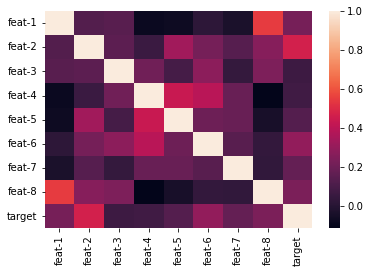

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.heatmap(df.corr())

0,7 and 1,8

# DATA SCALING

In [10]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder



df["feat-1_sc"] = df["feat-1"]/df["feat-1"].max()
df["feat-2_sc"] = df["feat-2"]/df["feat-2"].max()
df["feat-3_sc"] = df["feat-3"]/df["feat-3"].max()
df["feat-4_sc"] = df["feat-4"]/df["feat-4"].max()
df["feat-5_sc"] = df["feat-5"]/df["feat-5"].max()
df["feat-6_sc"] = df["feat-6"]/df["feat-6"].max()
df["feat-7_sc"] = df["feat-7"]/df["feat-7"].max()
df["feat-8_sc"] = df["feat-8"]/df["feat-8"].max()

df

,feat-1,feat-2,feat-3,feat-4,feat-5,feat-6,feat-7,feat-8,target,feat-1_sc,feat-2_sc,feat-3_sc,feat-4_sc,feat-5_sc,feat-6_sc,feat-7_sc,feat-8_sc
0,6,148,72,35,0,33.6,0.627,50,1,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284
1,1,85,66,29,0,26.6,0.351,31,0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716
2,8,183,64,0,0,23.3,0.672,32,1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062
3,1,89,66,23,94,28.1,0.167,21,0,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259
4,0,137,40,35,168,43.1,2.288,33,1,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.777778
764,2,122,70,27,0,36.8,0.340,27,0,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.333333
765,5,121,72,23,112,26.2,0.245,30,0,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.370370
766,1,126,60,0,0,30.1,0.349,47,1,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.580247


In [11]:
scaled_df=df.drop(['feat-1', 'feat-2' , 'feat-3', 'feat-4', 'feat-5', 'feat-6','feat-7', 'feat-8'],axis=1)
scaled_df

,target,feat-1_sc,feat-2_sc,feat-3_sc,feat-4_sc,feat-5_sc,feat-6_sc,feat-7_sc,feat-8_sc
0,1,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284
1,0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716
2,1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062
3,0,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259
4,1,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407
...,...,...,...,...,...,...,...,...,...
763,0,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.777778
764,0,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.333333
765,0,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.370370
766,1,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.580247


# Check class imbalance problem

In [12]:
#majority
print(len(scaled_df[scaled_df["target"]==0]))
print(len(scaled_df[scaled_df["target"]==0])/len(scaled_df["target"]))


500
0.6510416666666666


In [13]:
#minority class
print(len(scaled_df[scaled_df["target"]==1]))
print(len(scaled_df[scaled_df["target"]==1])/len(scaled_df["target"]))



268
0.3489583333333333


In [14]:
from imblearn.over_sampling import SMOTE,SMOTEN,SMOTENC

In [15]:
# transform the dataset

oversample = SMOTEN(sampling_strategy="minority", random_state=100, n_jobs=-1)

df_X=scaled_df[["feat-1_sc","feat-2_sc","feat-3_sc","feat-4_sc","feat-5_sc","feat-6_sc","feat-7_sc","feat-8_sc"]]
df_Y=scaled_df["target"]


data_X, data_Y = oversample.fit_resample(df_X, df_Y)

In [16]:
len(data_X)

1000

In [17]:
len(data_Y)

1000

In [18]:
print(len(data_Y[data_Y==0]))
print(len(data_Y[data_Y==0])/len(data_Y))

500
0.5


In [19]:
print(len(data_Y[data_Y==1]))
print(len(data_Y[data_Y==1])/len(data_Y))

500
0.5


# SPLIT DATA into 2 parts - train and test

In [20]:

df_X


,feat-1_sc,feat-2_sc,feat-3_sc,feat-4_sc,feat-5_sc,feat-6_sc,feat-7_sc,feat-8_sc
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.777778
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.333333
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.370370
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.580247


In [21]:
df_Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: target, Length: 768, dtype: int64

In [22]:

from sklearn.model_selection import train_test_split



# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.3)






In [23]:
X_train

,feat-1_sc,feat-2_sc,feat-3_sc,feat-4_sc,feat-5_sc,feat-6_sc,feat-7_sc,feat-8_sc
91,0.235294,0.618090,0.655738,0.151515,0.208038,0.476900,0.183058,0.419753
436,0.705882,0.703518,0.696721,0.333333,0.000000,0.557377,0.100826,0.506173
217,0.352941,0.628141,0.557377,0.303030,0.141844,0.447094,0.191736,0.395062
767,0.058824,0.467337,0.573770,0.313131,0.000000,0.453055,0.130165,0.283951
193,0.647059,0.678392,0.000000,0.000000,0.000000,0.779434,0.238843,0.493827
...,...,...,...,...,...,...,...,...
316,0.176471,0.497487,0.655738,0.111111,0.075650,0.287630,0.117355,0.370370
754,0.470588,0.773869,0.639344,0.323232,0.000000,0.482861,0.183058,0.555556
735,0.235294,0.477387,0.491803,0.323232,0.000000,0.527571,0.117355,0.345679
33,0.352941,0.462312,0.754098,0.000000,0.000000,0.296572,0.077686,0.345679


In [24]:
Y_train

91     0
436    0
217    0
767    0
193    1
      ..
316    0
754    1
735    0
33     0
165    1
Name: target, Length: 537, dtype: int64

# Model Config

# KNN- Lazy Model: 
* Good for less features and less observations
* less hyperparameters to tune

* but, we can apply for both regression model and for classification models as well. but, the diffrence is it uses diff distance formulas.


In [25]:

#Import k-nearest neighbors Classifier model

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier


#Create KNN Classifier

knn = KNeighborsClassifier(n_neighbors=13, p=2, metric='minkowski')





#hyper-parametrs: n_neighbours are k values we are using should be odd number(K=3,5,7,9,11,13) not much bigger values.
#check accuracy for each K and note down,
#once he test accuracy gone decreasing after sweep point stop it.
#p is the degree using in calculating distance formulas for numarical colum 
#metric is the formul using for distance calculation when P=1 manhatan, p=2 acts as euclideain

# more k more time takes,outliers become the neighbours if K is bigger value K=100

#radiusClassifiers is to avoide outliers as neighbors 


# TRAINING Model

In [26]:
#Train the model using the training sets but, KNn not learn any equation


knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=13)

# training accuracy

In [27]:
#training score using knn model

knn.score(X_train, Y_train)

0.7932960893854749

# Training accuracy manually:

K=3,P=2, train accuracy=83%
K =5 ,P=2, train accuracy is 82%   
K=7, P=2,P=2, train accuracy =81%        // K=7,P=1, train accuracy=78.2%
K=9, train accuracy =79%
K=11,P=2, train accuracy =79%
k=13,P=2, train accuracy=78.7%
K=15,P=2, train accuracy = 78%


K=[3,5,7,9,11,15]
train_accuracy=[.83,.82,.81,.79,.79, .78]

# TESTING PHASE

In [28]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

# test accuracy:

In [29]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.6753246753246753


# Training Accuracy for diff K values manually:

so, instead of doing it manually, use crossvalidation to the model by using gridsearch cv.

# Finding best K value visuvally
 
* Elbow chart  for K values  vs error rate
* KNEE chart   for K values vs test accuracy 

* to show visually which K value is the best, 
* why shoud take sweep point as limit of our model, why not higher K values.

C:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


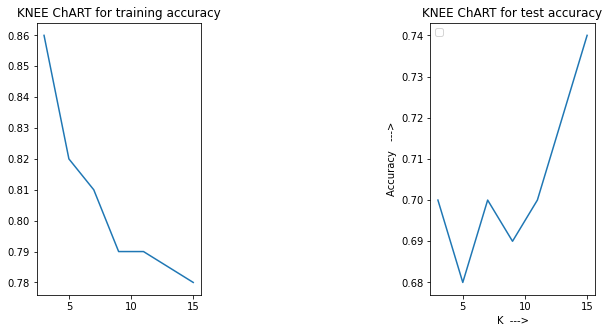

In [30]:
#  KNEE ChART
import matplotlib.pyplot as plt
import seaborn as sns

k = [3,5,7,9,11,15]

train_accuracy=[.86,.82,.81,.79,.79,.78]
test_accuracy=[.70,.68,.70,.69,.70,.74]


plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.lineplot( k, train_accuracy)
plt.title('KNEE ChART for training accuracy')


plt.subplot(1,3,3)
sns.lineplot( k, test_accuracy)
plt.title('KNEE ChART for test accuracy')



plt.xlabel('K  --->')
plt.ylabel('Accuracy   --->')


plt.legend()
plt.show()

In [31]:
from above graph 5,9 values are looking good.
but k=5 accuracy is 68% so, less.
for k=9,13 accuracy is 69%,.


SyntaxError: invalid syntax (Temp/ipykernel_1356/466696789.py, line 1)

# ERROR ANALYSIS

In [ ]:
len(X_test)

In [ ]:
len(Y_test)

In [ ]:
len(y_pred)

In [ ]:
output = Y_test - y_pred

print(len(Y_test), "Total Test Records \n")

print(len(output[output==0]) , "are correct classifcations \n")

print(len(output[output != 0]) , "are INcorrect classifcations \n")

In [ ]:
from sklearn import metrics

print(metrics.confusion_matrix(Y_test,y_pred))


In [ ]:
Total=126+24+46+35  
print("Total is",Total)

Accuracy=(126+34)/Total
print("Test Accuracy",Accuracy)

error_rate= (56+15)/Total
print("error_rate is",error_rate)



# Manually, Error rate

In [ ]:
for K=3, error rate=0.29, accuracy=0.70
k=5, error_rate=0.31,accuracy=0.68
K=7, error rate=0.29, accuracy=0.70
k=9,error=0.29,accuracy=0.70
K=11,error=0.29,accuracy=0.70
k=13, error=0.30, accuracy=0.69
K=15,error=0.25,accuracy=0.74


K=[3,5,7,9,11,13,15]
error_rate=[0.29,0.31,0.29,0.29,0.29,0.30,0.25]

In [51]:
import seaborn as sb
K=[3,5,7,9,11,15]
error_rate=[0.29, 0.31, 0.29, 0.29, 0.29, 0.30, 0.25]

sb.lineplot(k,error_rate)

C:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: All arrays must be of the same length

In [ ]:
error is less for k=5,7,11 values.

so, from test accuracy k=11 score is 70% and erroe is less for k=11 i.e 0.29. so, best value is K=11

# Test_accuracy score-for loop

In [48]:
test_accuracy_score=[]

for i in range(3,15,2):
    
    knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski' )
    
    knn.fit(X_train,Y_train)
    
    
    train_score=knn.score(X_train,Y_train)
    
    test_score= metrics.accuracy_score(Y_test, knn.predict(X_test))
    print("K=",i,"test_score is:",test_score)

    test_accuracy_score.append(test_score)

    
#and reaper this loop for p=1,3,5 also, with different combinations of metric , 
#so, instead repeting apply crossvalidatiion through, gridserachcv
    

K= 3 test_score is: 0.7316017316017316
K= 5 test_score is: 0.7359307359307359
K= 7 test_score is: 0.70995670995671
K= 9 test_score is: 0.70995670995671
K= 11 test_score is: 0.696969696969697
K= 13 test_score is: 0.6753246753246753


In [33]:
test_accuracy_score

#test_accuracy=[.70,.68,.70,.69,.70,.69, .74]

[0.7316017316017316,
 0.7402597402597403,
 0.7359307359307359,
 0.696969696969697,
 0.70995670995671,
 0.70995670995671,
 0.70995670995671,
 0.683982683982684,
 0.696969696969697,
 0.6623376623376623,
 0.6753246753246753,
 0.6623376623376623]

# Error rate --using for loop

In [49]:
import numpy as np
error_rate = []
# Will take some time
for i in range(3,15,2):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_k = knn.predict(X_test)
 error_rate.append(np.mean(pred_k != Y_test))
 print("k=",i,"error_rate is:",np.mean(pred_k != Y_test))
 

k= 3 error_rate is: 0.2683982683982684
k= 5 error_rate is: 0.26406926406926406
k= 7 error_rate is: 0.29004329004329005
k= 9 error_rate is: 0.29004329004329005
k= 11 error_rate is: 0.30303030303030304
k= 13 error_rate is: 0.3246753246753247


In [ ]:
# Knee and Elbow charts  

C:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


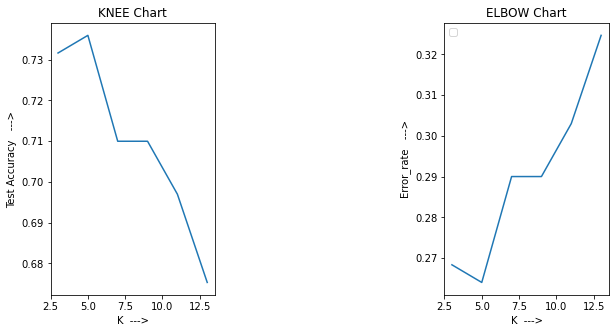

In [50]:

import matplotlib.pyplot as plt
import seaborn as sns
k=range(3,15,2)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.lineplot( k, test_accuracy_score)
plt.title('KNEE Chart')
plt.xlabel('K  --->')
plt.ylabel('Test Accuracy   --->')


plt.subplot(1,3,3)
sns.lineplot( k, error_rate)
plt.title('ELBOW Chart')
plt.xlabel('K  --->')
plt.ylabel('Error_rate   --->')


plt.legend()
plt.show()

# KNN-model with Radius NeighborsClassifier

In [36]:
#Training model-2


knn_r= RadiusNeighborsClassifier(radius=1.0, p=2, metric='minkowski')

In [37]:
knn_r.fit(X_train, Y_train)

RadiusNeighborsClassifier()

In [38]:
#training score using knn model
knn_r.score(X_train, Y_train)

0.6554934823091247

In [40]:
#Predict the response for test dataset
y_pred = knn_r.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.6406926406926406


# hyper paramters-Tunning the model

# CROSS VALIDATION

# GRID SEARCH CROSS VALIDATION  -- to find best model


In [42]:
from sklearn.model_selection import GridSearchCV



params = [
    {
        'n_neighbors': [3,5,7,9,11,13],
     
         'p': [2],
     
         'metric': ['minkowski']
    }
]


gs_knn = GridSearchCV(KNeighborsClassifier(),
                      
                      param_grid=params,
                     
                      scoring='accuracy',
                      
                      cv=5)



gs_knn.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['minkowski'],
                          'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [2]}],
             scoring='accuracy')

In [43]:
gs_knn.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [44]:
gs_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'p': 2}

In [45]:
gs_knn.best_score_

0.7672377985462097

In [46]:
gs_knn.cv_results_

{'mean_fit_time': array([0.00459871, 0.0034688 , 0.00299897, 0.00280194, 0.00240331,
        0.00340767]),
 'std_fit_time': array([1.01632216e-03, 9.41849962e-04, 4.90933902e-07, 4.00690988e-04,
        4.87396073e-04, 4.84048797e-04]),
 'mean_score_time': array([0.01179018, 0.00739489, 0.00759435, 0.00699806, 0.00719013,
        0.00738616]),
 'std_score_time': array([0.00146989, 0.00049039, 0.00080049, 0.00063255, 0.00039231,
        0.00135769]),
 'param_metric': masked_array(data=['minkowski', 'minkowski', 'minkowski', 'minkowski',
                    'minkowski', 'minkowski'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[2, 2, 2, 2, 2, 2],
              mask=[False, False, False, False, False, False],
      

# CONCLUSION: 

*Form the graphs, and gridserach cv K)7 is the best both test accuracy and less error .